In [1]:
import spacy
import re
import en_core_web_sm
import en_core_web_lg
import math

In [2]:
nlp_sm = en_core_web_sm.load()
nlp_sm.max_length = 2500000

nlp_lg = en_core_web_lg.load()
nlp_lg.max_length = 2500000

In [8]:
doc = nlp_sm(u"Apple is looking at buying U.K. startup for $1 billion. Bran Stark is a boy.")
for token in doc:
   print(token.lemma_, token.text) 
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Apple Apple
be is
look looking
at at
buy buying
U.K. U.K.
startup startup
for for
$ $
1 1
billion billion
. .
Bran Bran
Stark Stark
be is
a a
boy boy
. .
Apple 0 5 ORG
U.K. 27 31 GPE
$1 billion 44 54 MONEY
Stark 61 66 PERSON


In [22]:
def union_entities(listA, listB):
    result = listA
    for ent_b,y1,y2 in listB:
        overlap = False
        for ent_a,x1,x2 in listA:
            if x1 <= y2 and y1 <= x2: # overlap
                overlap = True
                if (y2-y1) > (x2-x2): # the largest entity is B
                    result.remove((ent_a,x1,x2))
                    result.append((ent_b,y1,y2))
                break
        if not overlap:
            result.append((ent_b,y1,y2))
    return result


def process_chapter(chapter):
    doc1 = nlp_sm(chapter)
    doc2 = nlp_lg(chapter)
    sm = []
    lg = []
    for ent in doc1.ents:
        if ent.label_ == 'PERSON':
            sm.append((ent.text, ent.start_char, ent.end_char))
    for ent in doc2.ents:
        if ent.label_ == 'PERSON':
            lg.append((ent.text, ent.start_char, ent.end_char))

    return union_entities(sm,lg)


def process_book(head, tail, book_number):
    filename = head + str(book_number) + tail
    with open(filename) as fp:
        book = fp.read()
    regex = r"\n{1,}([A-Z\s]+)\n{2,}"
    chunks = re.split(regex,book)
    
    entities = {}
    for index, chunk in enumerate(chunks):
        if chunk.isupper():
            #print(chunk.strip().title(),chunks[index+1][:100].strip())
            title = str(book_number) + '–' + str(math.floor(index/2)) + '-' + chunk.strip().title()
            chapter = chunks[index+1].strip().replace('\t','').replace('"','').replace('\n',' ').replace(' . . .','...')
            entities[title] = process_chapter(chapter)
    return entities

def process_book_for_stats(head, tail, book_number):
    paragraphs = []
    sentences = []
    
    filename = head + str(book_number) + tail
    with open(filename) as fp:
        book = fp.read()
    regex = r"\n{1,}([A-Z\s]+)\n{2,}"
    chunks = re.split(regex,book)
    for chunk in chunks:
        if not chunk.isupper():
            paragraphs += [len(l) for l in chunk.split('\n')]
            sentences += [len(l) for l in chunk.split('.')]
    return paragraphs,sentences

In [5]:
characters = {} #––––––––––––––––––––––––––––––––
for i in range (1,6):
    characters.update(process_book('books/GOT','.txt',i))
    print('book',i,'done')

book 1 done
book 2 done
book 3 done
book 4 done
book 5 done


In [7]:
import pickle
with open ('GOT-characters-raw.pickle','wb+') as blavlaz:
    pickle.dump(characters, blavlaz)

In [23]:
paragraphs = []
sentences = []
for i in range (1,6):
    p, s = process_book_for_stats('books/GOT','.txt',i)
    paragraphs+= p
    sentences += s
    print('book',i,'done')

book 1 done
book 2 done
book 3 done
book 4 done
book 5 done


In [77]:
paragraphs

[2142,
 1770,
 1758,
 1748,
 1728,
 1641,
 1604,
 1597,
 1549,
 1540,
 1524,
 1453,
 1452,
 1452,
 1432,
 1432,
 1412,
 1410,
 1401,
 1400,
 1397,
 1391,
 1383,
 1376,
 1372,
 1367,
 1366,
 1365,
 1360,
 1354,
 1349,
 1338,
 1337,
 1337,
 1333,
 1329,
 1329,
 1325,
 1322,
 1320,
 1319,
 1318,
 1311,
 1305,
 1284,
 1284,
 1279,
 1276,
 1274,
 1273,
 1273,
 1271,
 1271,
 1270,
 1270,
 1269,
 1269,
 1265,
 1263,
 1262,
 1261,
 1259,
 1258,
 1257,
 1255,
 1253,
 1248,
 1243,
 1240,
 1238,
 1230,
 1230,
 1229,
 1228,
 1227,
 1225,
 1223,
 1214,
 1208,
 1207,
 1207,
 1206,
 1205,
 1203,
 1200,
 1199,
 1199,
 1197,
 1194,
 1194,
 1193,
 1192,
 1190,
 1187,
 1185,
 1183,
 1182,
 1178,
 1177,
 1176,
 1165,
 1159,
 1155,
 1153,
 1149,
 1148,
 1148,
 1146,
 1144,
 1143,
 1143,
 1140,
 1140,
 1140,
 1140,
 1139,
 1138,
 1136,
 1136,
 1136,
 1135,
 1135,
 1135,
 1134,
 1132,
 1131,
 1131,
 1130,
 1129,
 1129,
 1128,
 1127,
 1125,
 1124,
 1124,
 1124,
 1121,
 1120,
 1119,
 1116,
 1113,
 1112,
 1107,

447.78167841419247
153.47347783068963
341.0
83.0


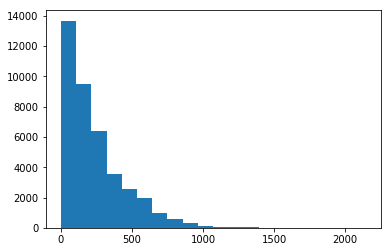

In [79]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot

print(np.mean(paragraphs)+np.std(paragraphs))
print(np.mean(sentences)+2*np.std(sentences))
print(np.percentile(paragraphs,75))
print(np.percentile(sentences,75))
paragraphs.sort(reverse=True)
pyplot.hist(paragraphs, bins=20)
pyplot.show()

In [72]:
import powerlaw
results = powerlaw.Fit(sentences)
print(results.power_law.alpha)
print(results.power_law.xmin)
R, p = results.distribution_compare('power_law', 'lognormal_positive')
print (R,p)
print()
import scipy.stats
shape, location, scale = scipy.stats.lognorm.fit(sentences)
mu, sigma = np.log(scale), shape
print(shape, location, scale, mu, sigma)
scipy.stats.kstest([s for s in sentences if s > results.power_law.xmin], "lognorm", scipy.stats.lognorm.fit([s for s in sentences if s > results.power_law.xmin]))

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


7.286632630308161
231.0
1.8935249249604267 0.06239088233036487

8.74309235080197 -1.1001041678845462e-21 1.045701399828447 0.044687856273558424 8.74309235080197


KstestResult(statistic=0.04099956703146601, pvalue=0.09096218265176727)